# Visualização de dados em Python com Matplotlib (Parte 2)

## Utilizando os dados do DataFrame da aula anterior:

In [1]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Histogramas
- Os histogramas são usados para variáveis numéricas. Considerando que, um gráfico de barras mostra as contagens de categorias exclusivas, um histograma mostra o número de dados com valores dentro de uma caixa. As caixas dividem os valores da variável em segmentos iguais. 
- O eixo vertical do histograma mostra a contagem de valores de dados dentro de cada caixa.
- O código abaixo segue nossa mesma receita básica para criar um histograma de tamanho do motor. Observe, no entanto, que a coluna do quadro de dados que desejamos plotar é especificada pelo nome como **auto_prices ['engine-size']**.

Text(0,0.5,'Number of autos')

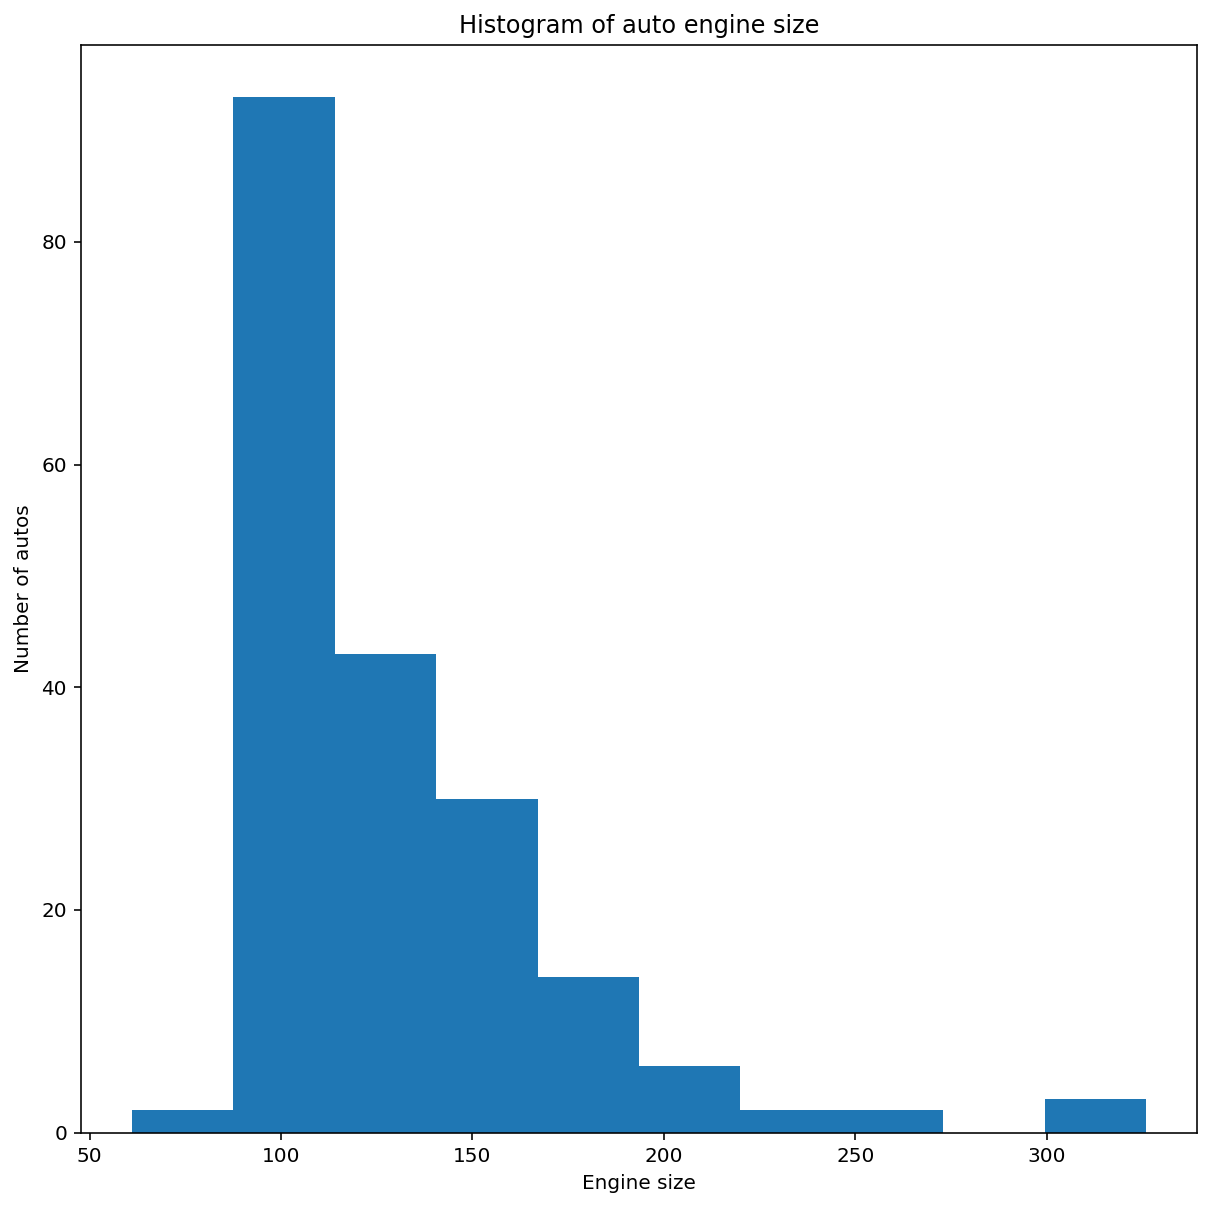

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

**Box-Plot**
- Os box-plots foram introduzidos por John Tukey em 1970. Estes gráficos são outra maneira de visualizar a distribuição de valores de dados. A este respeito, os gráficos de caixa são comparáveis aos histogramas, mas são bastante diferentes na apresentação.

- Em um gráfico de caixa, o valor médio é mostrado com uma barra escura. Os dois qartiles internos dos valores de dados estão contidos na "caixa". Os "wiskers" incluem a maioria dos dados. Os outliers são mostrados por símbolos através dos wiskers.

- Vários parcelas de caixa podem ser empilhadas ao longo de um eixo. Os dados são divididos usando uma operação 'por grupo', e os gráficos de caixa para cada grupo são empilhados um ao lado do outro. Desta forma, o gráfico de caixa permite exibir duas dimensões do seu conjunto de dados.

- O código na célula abaixo geralmente segue a receita que estamos usando. O quadro de dados está subconectado a duas colunas. Uma coluna contém os valores numéricos para plotar e a outra coluna é o grupo por variável. Nesse caso, o grupo por variável é especificado com o argumento by = 'fuel-type'.

Text(0,0.5,'Engine size')

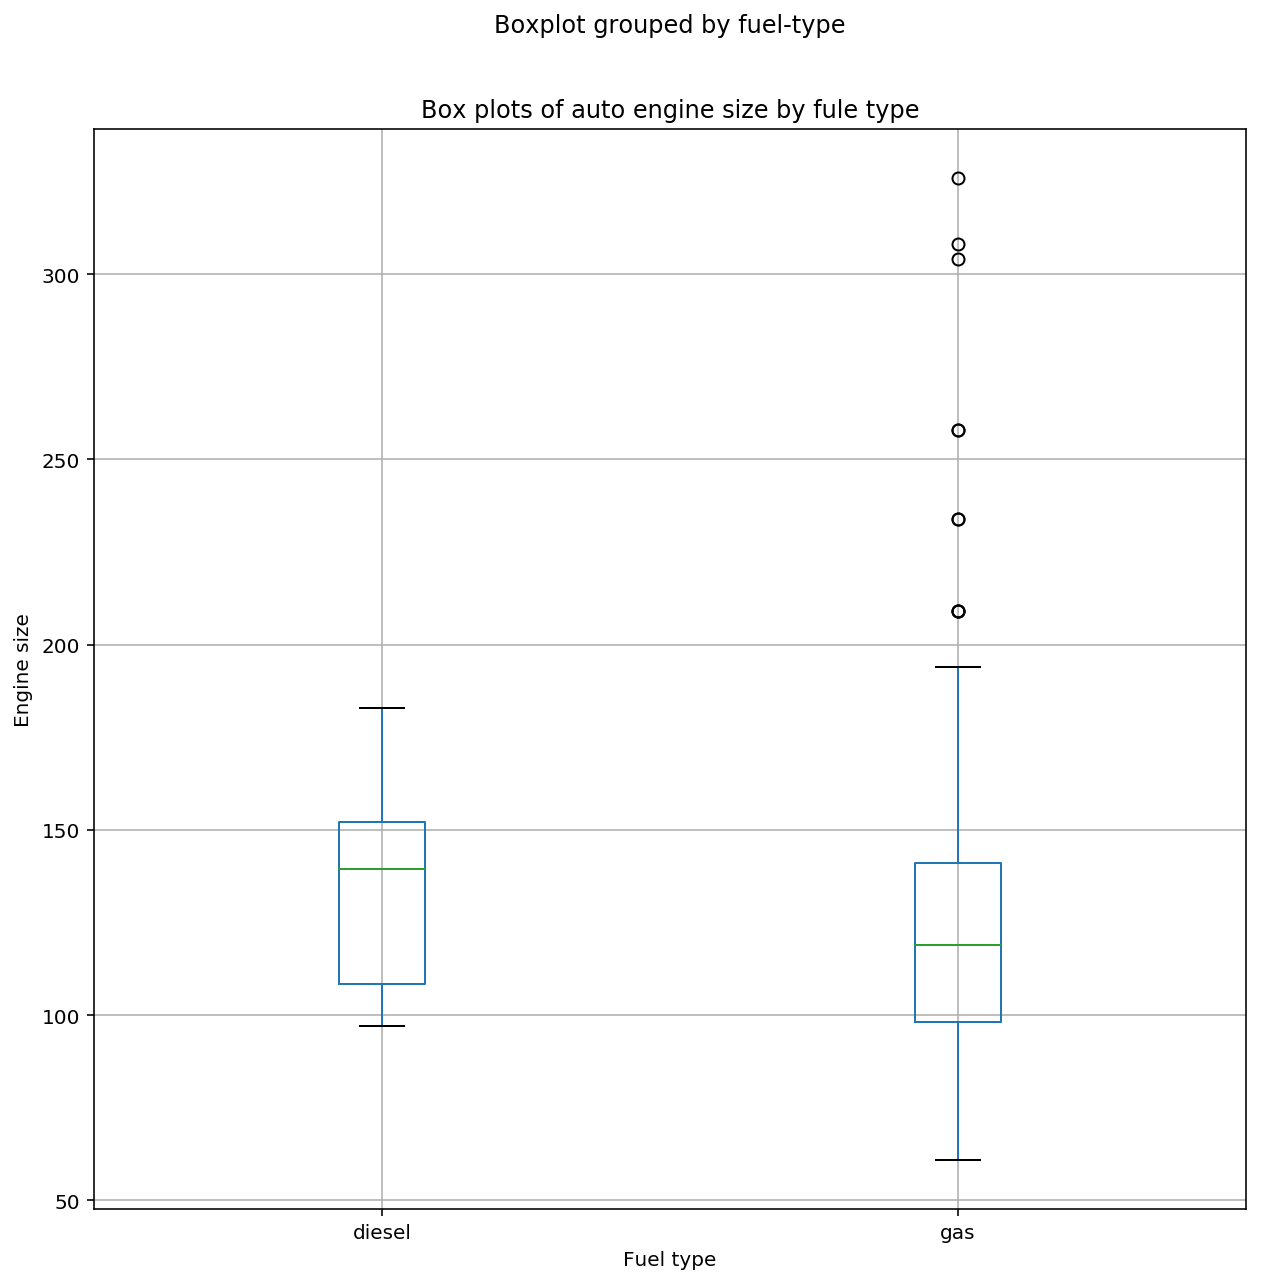

In [6]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

- Examine o gráfico acima e observe as diferenças na distribuição do tamanho do motor por tipo de combustível. Existe uma sobreposição considerável na faixa inter-quartil (o intervalo dentro das caixas), com carros a gás com motores geralmente mais pequenos. O tamanho médio do motor (a barra vermelha) para carros a gás é visivelmente menor do que para carros a diesel. No entanto, a gama de tamanhos de motores para carros a gás é maior, incluindo alguns outliers. É provável, estes são os valores anormais que vimos no histograma.

**Parcelas de densidade de kernel e introdução a Seaborn**
- Até agora, trabalhamos exclusivamente com gráficos com matplotlib. Agora vamos começar a trabalhar com o pacote Seaborn. Seaborn é um pacote Python mais recente que gera gráficos mais bonitos e que permitem interação. 


- As parcelas de densidade de Kernel são semelhantes em conceito a um histograma. Um gráfico de densidade de kernel exibe os valores de uma curva de densidade suavizada dos valores de dados. Em outras palavras, o gráfico de densidade do núcleo é uma versão suavizada de um histograma.

- O código na célula abaixo cria um gráfico de violino usando a seguinte receita:

1. Importe o pacote Seaborn,
2. Defina um estilo para a grade do gráfico.
3. Defina o kdeplot da coluna do tamanho do motor.

**Nota:** Dependendo da sua plataforma e versões do Numpy, você pode ver um aviso de decomposição. Você pode ignorar este aviso com segurança.

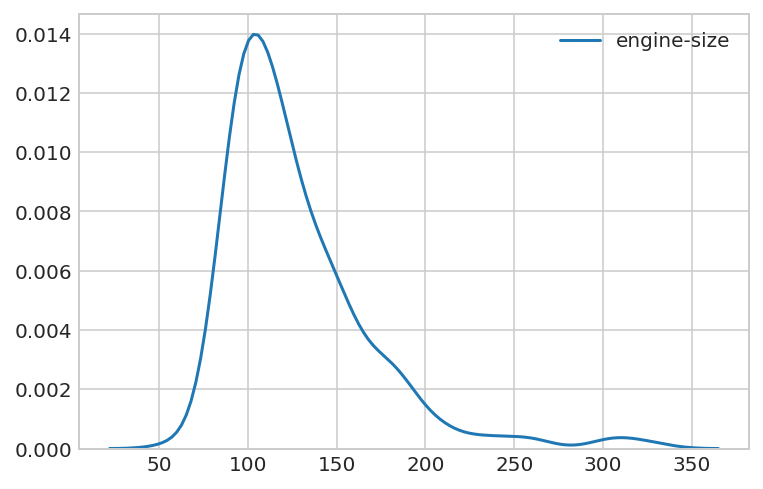

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'])

- Os resultados do plot do KDE são semelhantes aos que observamos com o histograma do tamanho do motor. O tamanho do motor é inclinado em direção ao tamanho pequeno, e existem outliers de alguns carros com grandes motores claramente visíveis.

- Como fizemos com os dataframes pandas, controlamos as propriedades de um terreno de Seaborn, especificando os eixos. O código na célula abaixo amplia nossa receita simples para lotes de Seaborn:

1. Defina uma figura.
2. Defina um ou mais eixos na figura.
3. Defina um estilo para a grade do gráfico.
4. Defina o kdeplot da coluna do tamanho do motor.
5. Use métodos nos eixos para controlar atributos como títulos e rótulos de eixos.

Text(0,0.5,'Density')

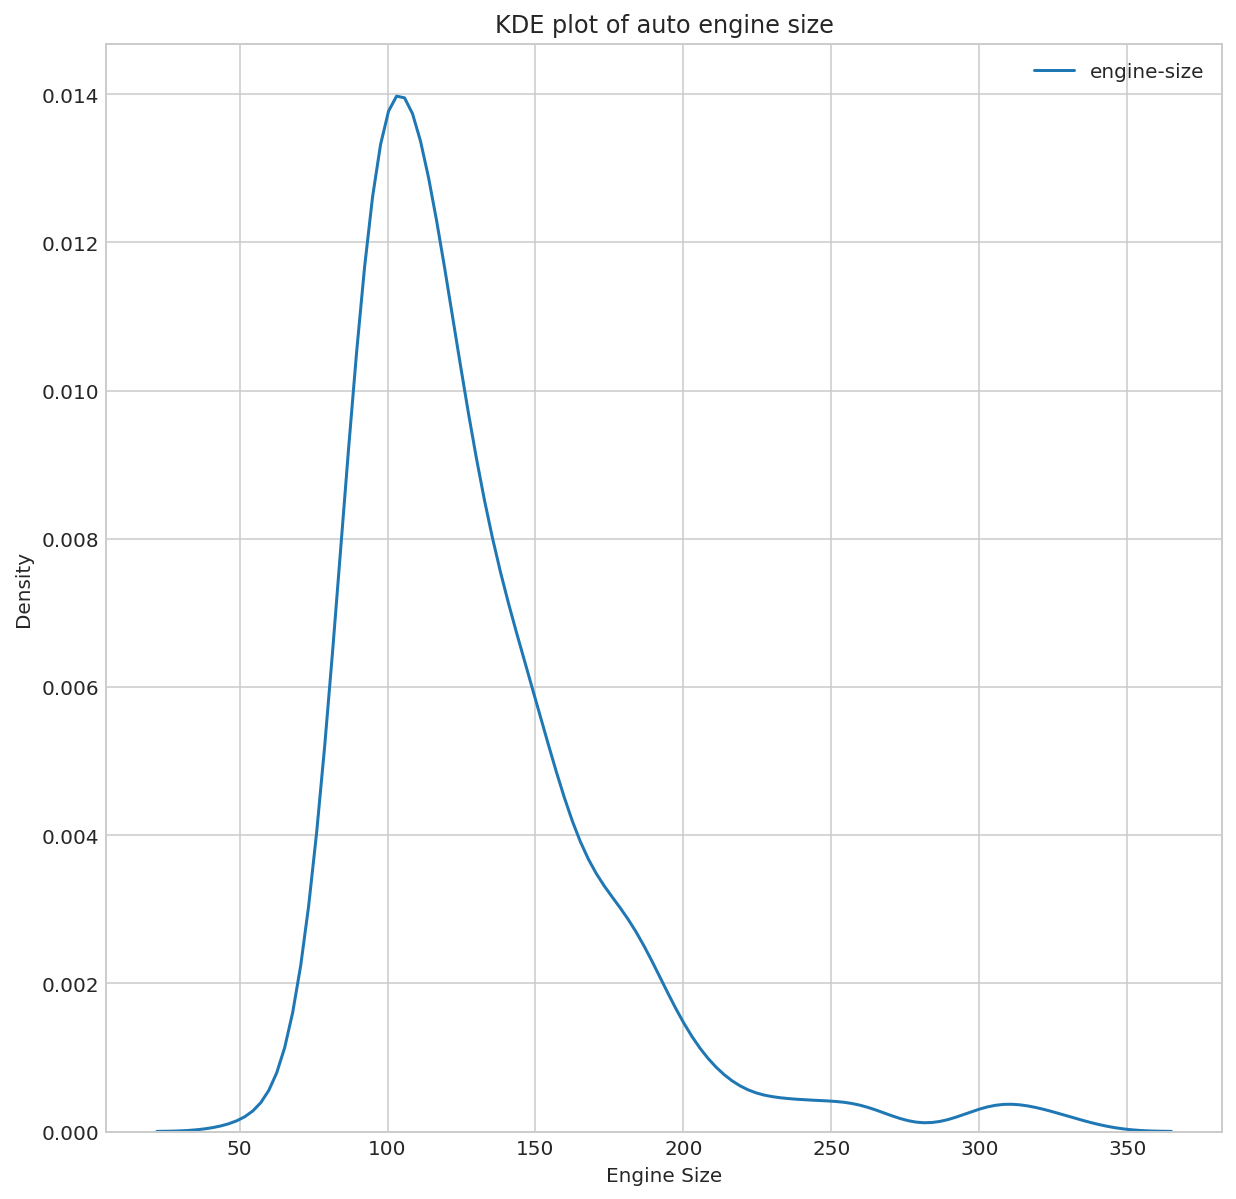

In [8]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'], ax = ax)
ax.set_title('KDE plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

- Também podemos criar um gráfico bidimensional do KDE. O código na célula abaixo cria um gráfico de preço e tamanho do motor bidimensional segundo a mesma receita.

/ext/anaconda3/lib/python3.5/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0,0.5,'Price')

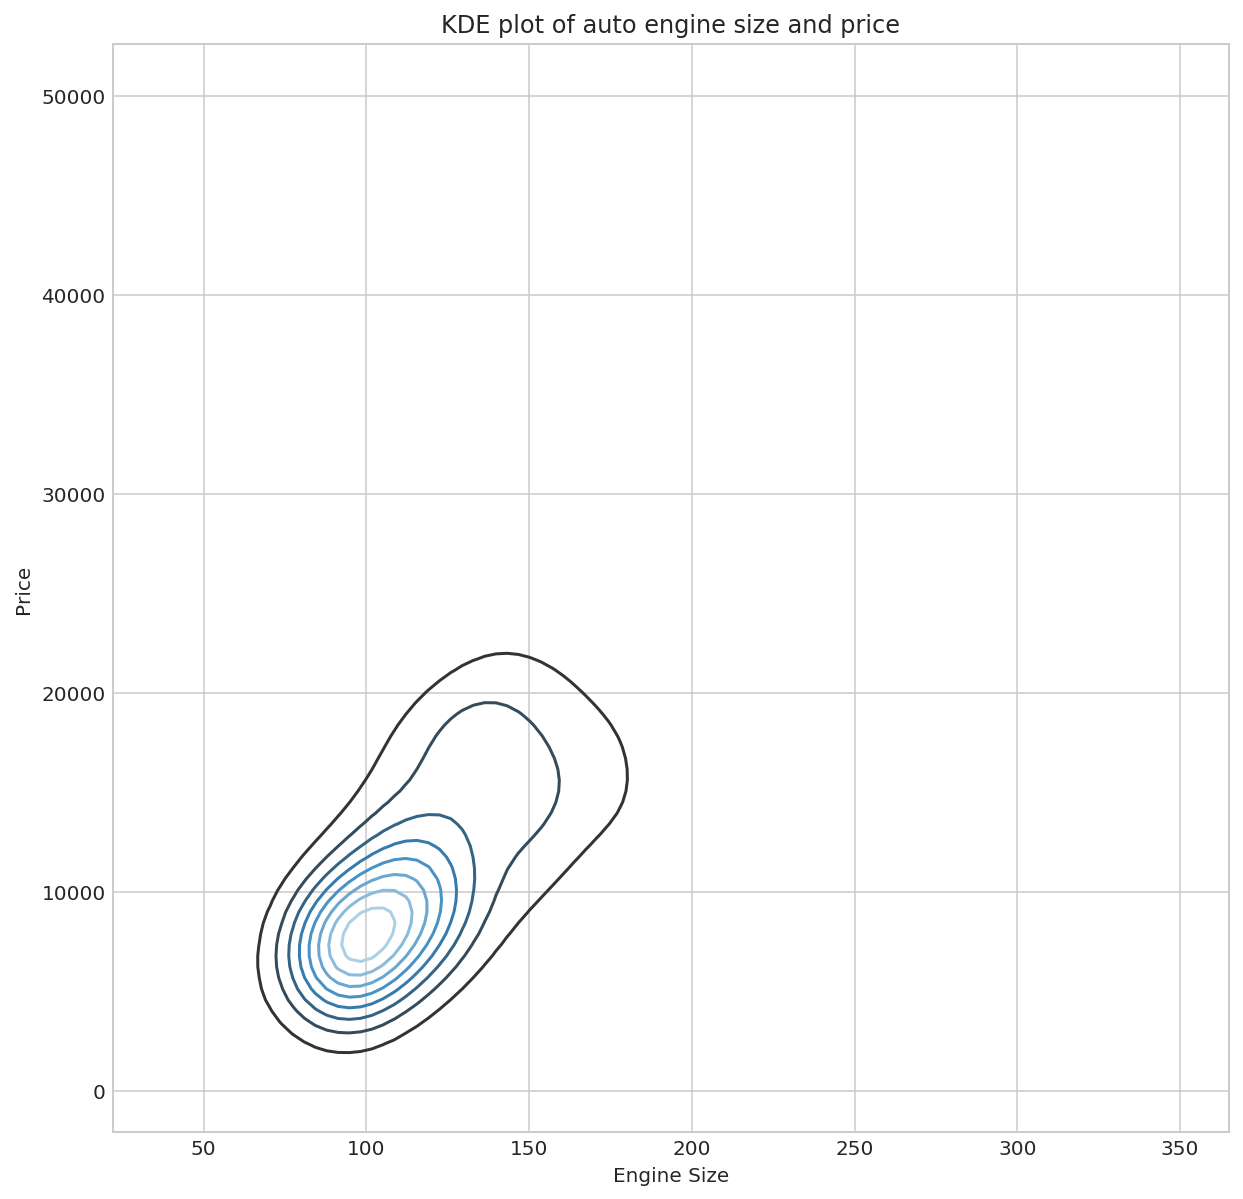

In [9]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices[['engine-size', 'price']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of auto engine size and price') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Price')# Set text for y axis

- Podemos ver claramente que existe um único modo forte para o preço do automóvel e o tamanho do motor. Existe uma inclinação de ambas as variáveis para carros de menor custo com motores menores.

**Violin plot**
- O código na célula abaixo segue a receita que estabelecemos para plotar Seaborn. O método ***sns.violinplot*** possui mais argumentos do que o método kdeplot.

1. As colunas utilizadas para o enredo são definidas com os argumentos x e y.
2. A coluna x é o grupo por variável.
3. O argumento de dados especifica um quadro de dados de pandas ou uma matriz numpy.

Text(0,0.5,'Engine size')

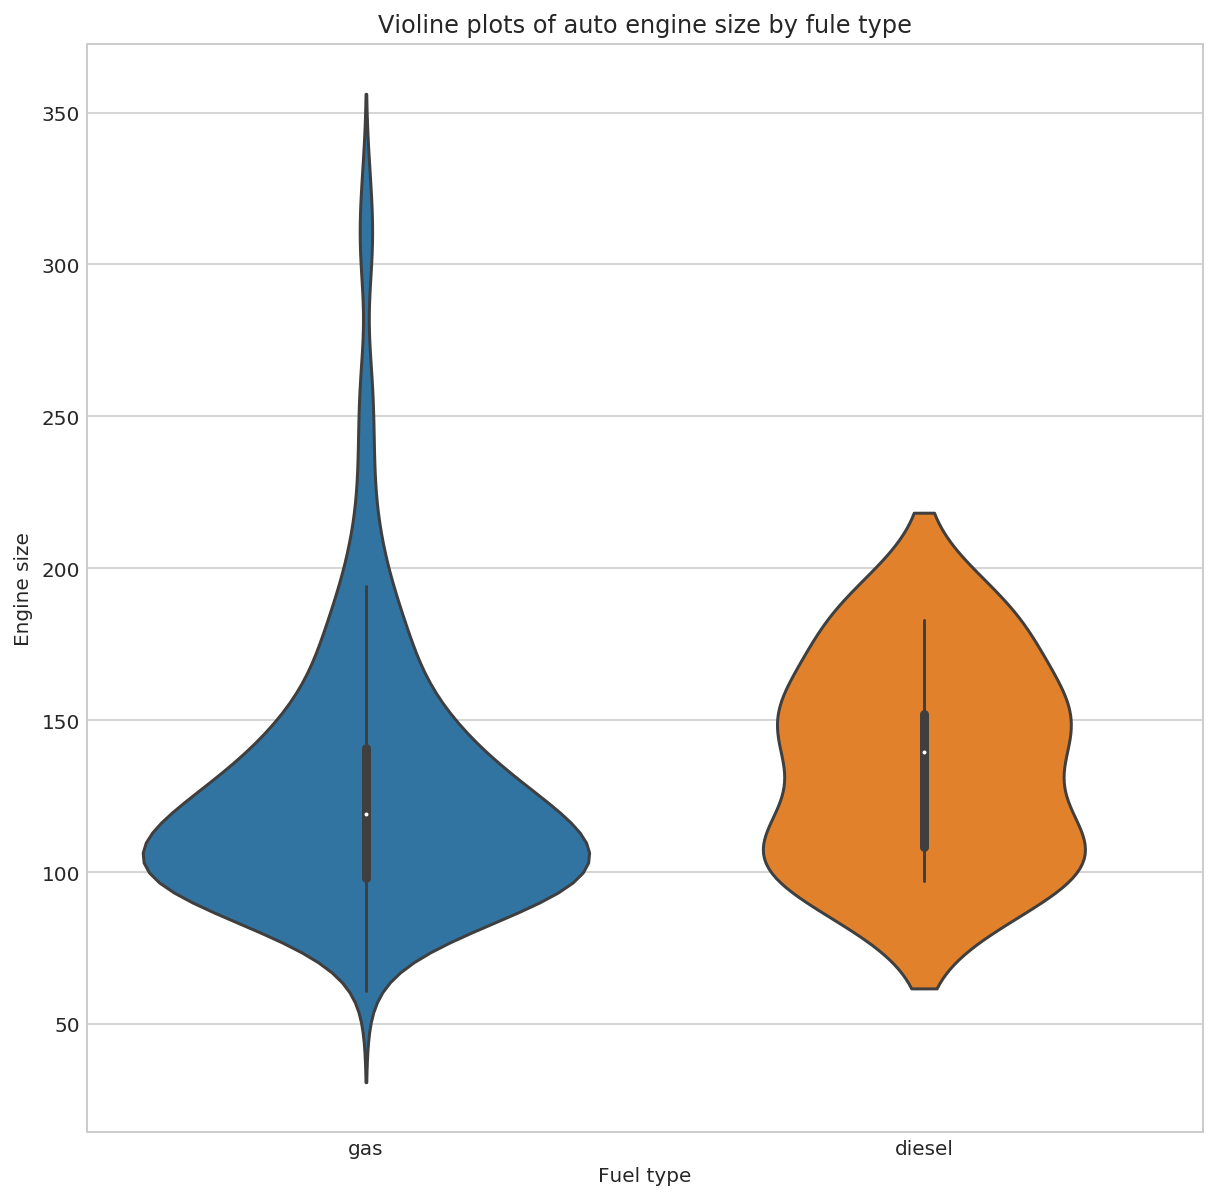

In [10]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

- As diferenças na distribuição dos tamanhos de motores entre carros a gás e diesel são claramente visíveis no plot violino. Podemos confirmar que o tamanho do motor dos carros a gás está inclinado para o tamanho pequeno. Existem alguns carros a gás com tamanhos de motores muito pequenos e uma série de automóveis que aparecem como outliers com motores grandes. A distribuição de tamanhos de motores diesel é mais uniforme.

**Exibindo várias dimensões com estética**

- Nós já exploramos alguns tipos básicos de plot. Todas as parcelas que criamos até agora são projetadas em uma superfície bidimensional. Assim, ficamos limitados à visualização de apenas duas dimensões do nosso conjunto de dados.

- Agora, usaremos a estética do gráfico para visualizar dimensões adicionais do conjunto de dados. Estéticas específicas são usadas para projetar dimensões adicionais em uma superfície de trama bidimensional. Além disso, a escolha cuidadosa da estética do plot pode destacar certos aspectos de um conjunto de dados que você está explorando.

- Há uma possível estética possível para a visualização. Exemplos específicos com os quais trabalharemos incluem:

1. Cor
2. Transparência
3. Tamanho
4. Forma do marcador
5. Estética específica para o tipo de lote

- O uso de estética com um pouco de inteligência pode levar a informações interessantes sobre um conjunto de dados. 

**Cor**
- A cor pode ser usada para ver uma dimensão adicional em um gráfico de dispersão. Um fator categórico pode ser mostrado usando cores diferentes para as diferentes categorias.
- Cuidado! Certifique-se de usar uma paleta com cores distintivas para cada cateogria. Muitas categorias usando cores similares são invariavelmente difíceis de ver e impossíveis de interpretar.
- O código na célula abaixo usa o argumento de matiz para adicionar uma terceira dimensão, tipo de combustível para um gráfico de dispersão. Uma paleta de cores também é especificada.

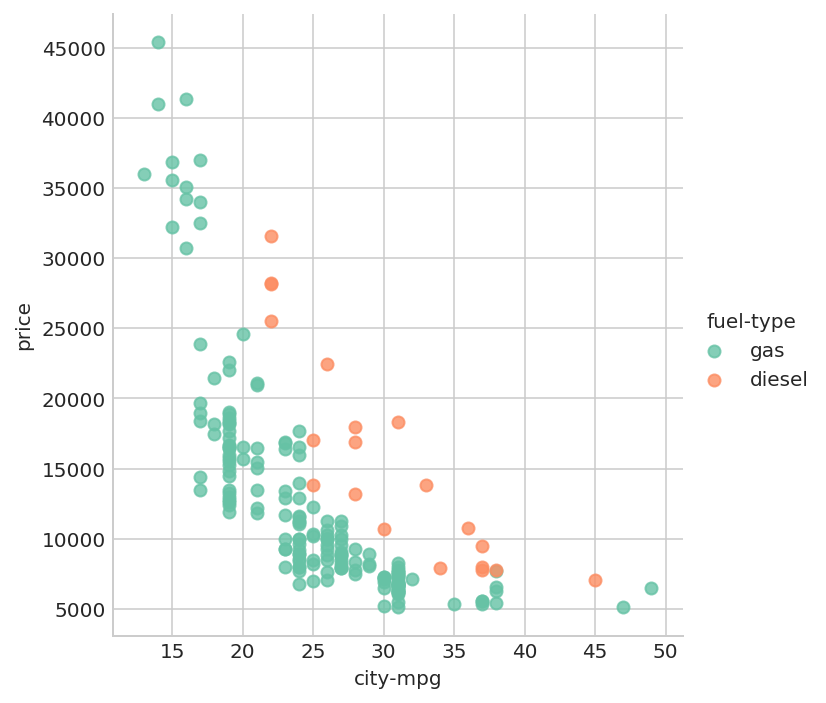

In [11]:
sns.lmplot(x = 'city-mpg', y = 'price', data = auto_prices, hue = "fuel-type", palette="Set2", fit_reg = False)

- No gráfico acima, podemos ver que um carro diesel é geralmente mais caro em uma determinada eficiência de combustível. Também podemos ver que todos os carros menos eficientes e mais caros possuem motores a gás.
- Se estamos dispostos a criar mais códigos, podemos ganhar muito mais controle sobre a estética do plano. O código na função mostrada abaixo divide os dados em subconjuntos e os traça com diferentes estéticas no mesmo conjunto de eixos. A receita é:

1. Importe os pacotes necessários
2. Loop sobre uma lista de nomes de colunas para o eixo horizontal. Neste exemplo, nós apenas especificamos um.
4. Defina uma figura e eixos para o enredo
5. Divida os dados por carros a gás e diesel.
6. Se o subconjunto tiver mais de zero membros, crie gráficos de dispersão com a estética definida. Nesse caso, o atributo é cor definida como DarkBlue ou Red.
7. Crie uma lista de patches e exiba os patches para o ledgend.

'Done'

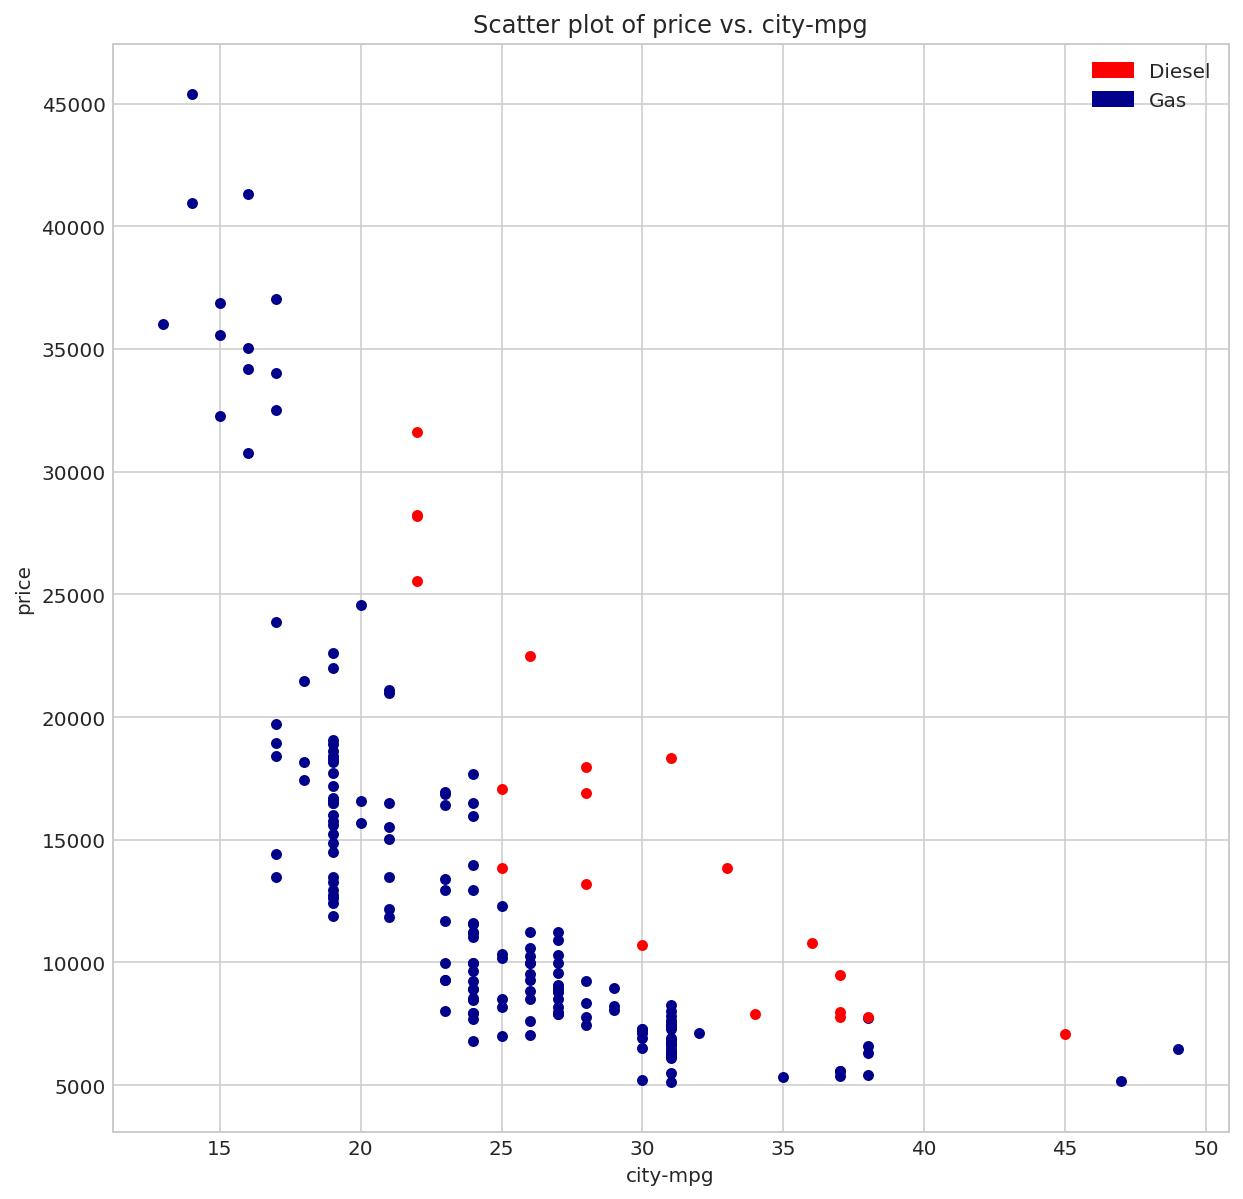

In [21]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_prices, ['city-mpg'])

**Transparência**
- No gráfico de dispersão acima, observe que há áreas na trama com densos agrupamentos de pontos. Em particular, existem pontos sobrepostos para carros a gás com mpg da cidade entre 19 e 31 (o mpg é aparentemente relatado em unidades inteiras).
- Por causa do efeito de "excesso de traçado" é difícil ver exatamente quantos carros estão representados em algumas regiões da trama. Transparência, é uma estética útil para superar o excesso de traçado. A transparência é definida em uma escala de 0 (completamente transparente ou invisível) para 1 (perfeitamente opaco). Ao escolher valores de transparência razoáveis, você pode ter uma idéia de quantos pontos são agrupados em uma pequena área de um enredo.
- O código na célula abaixo segue a receita acima mencionada. Um argumento de transparência, alfa, foi adicionado.

['city-mpg']

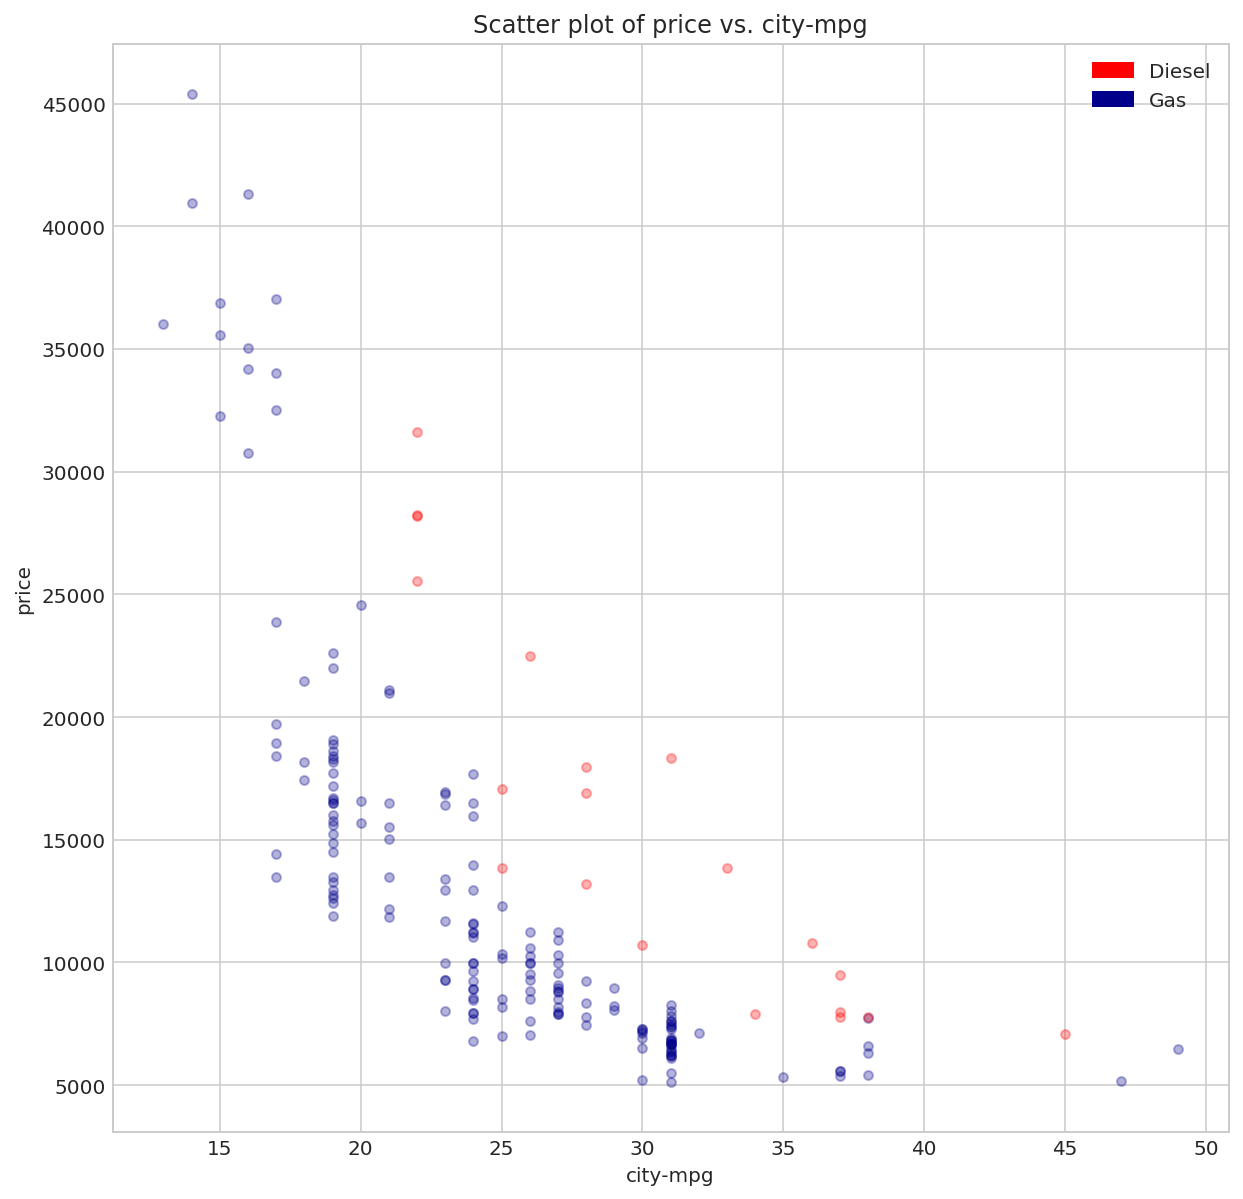

In [13]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha = 0.3) 
        ax.set_title('Scatter plot of price vs. ' + col)
        red_patch = mpatches.Patch(color='Red', label='Diesel')   
        blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
        plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_prices, ['city-mpg'])

**Usando o tamanho do marcador**
- Outra estética que pode projetar uma dimensão adicional em um gráfico bidimensional é o tamanho do marcador. O código na célula abaixo usa o tamanho escalonado do marcador para indicar o tamanho do motor.

['city-mpg']

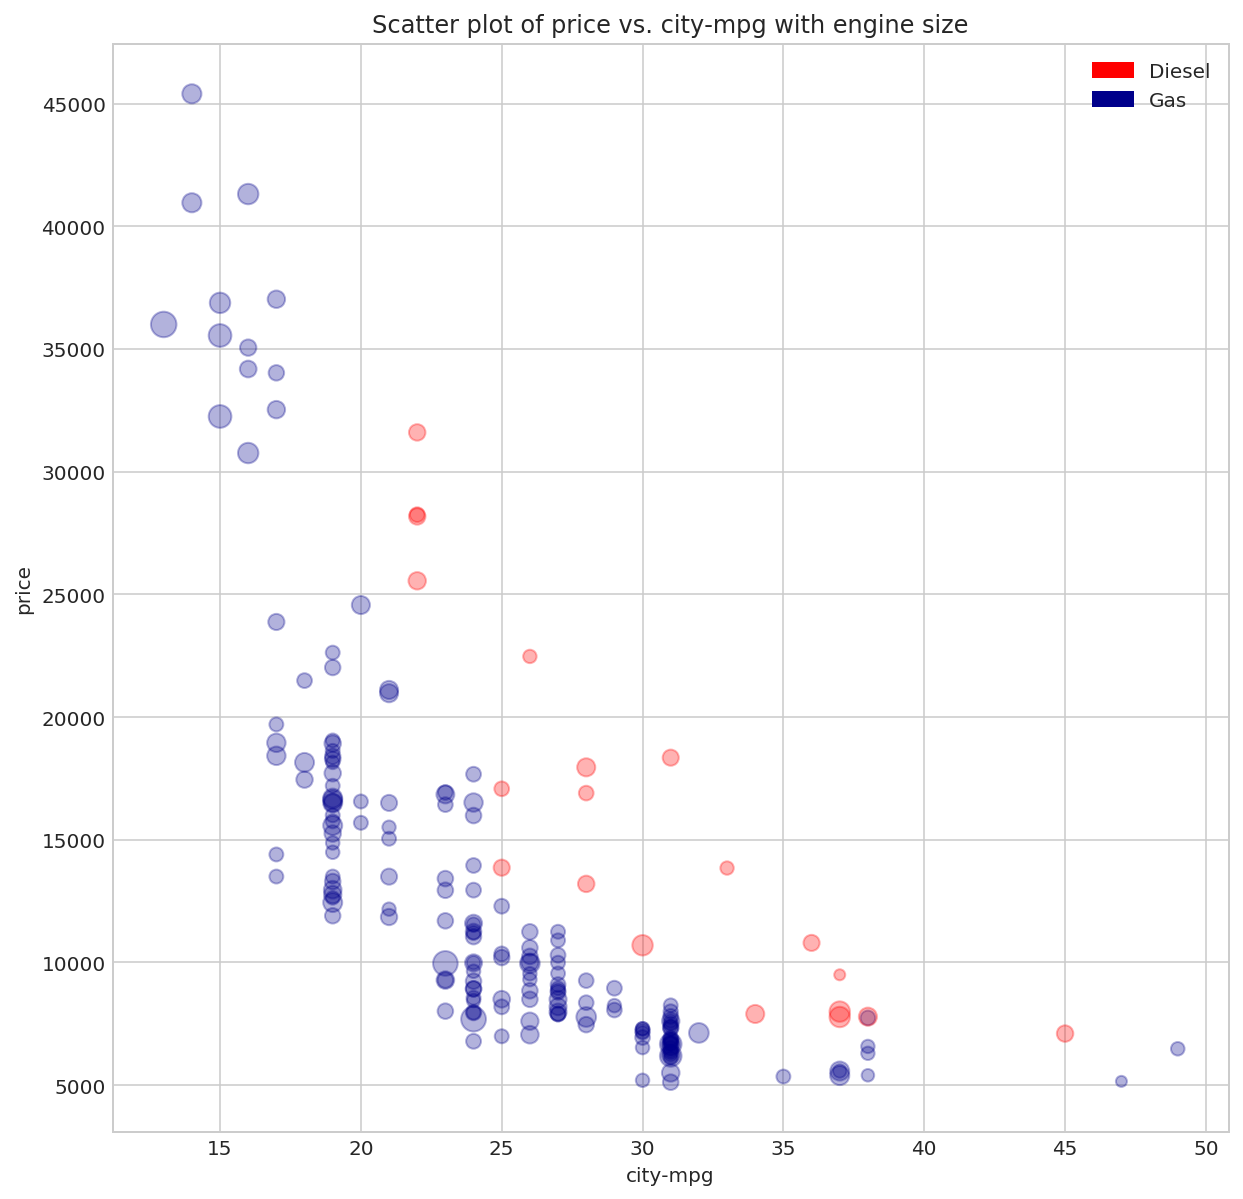

In [14]:
def auto_size(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .5 * auto_prices['engine-size'], alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .5 * auto_prices['engine-size'], alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_size(auto_prices, ['city-mpg'])

- Examine o gráfico acima observando os diferentes tamanhos de marcador. Com marcadores maiores, a configuração da transparência é mais necessária do que nunca.
- Você pode notar que a diferença no tamanho do motor nem sempre é aparente no gráfico acima. Usar o tamanho do marcador pode ser um pouco complicado. Outra opção é usar o quadrado do valor que está sendo projetado para determinar o tamanho do marcador. A área do marcador é então proporcional ao valor de interesse, em vez do tamanho do marcador menos perceptível.
- O código na célula abaixo usa o quadrado do tamanho do motor para determinar o tamanho do marcador.

'Done'

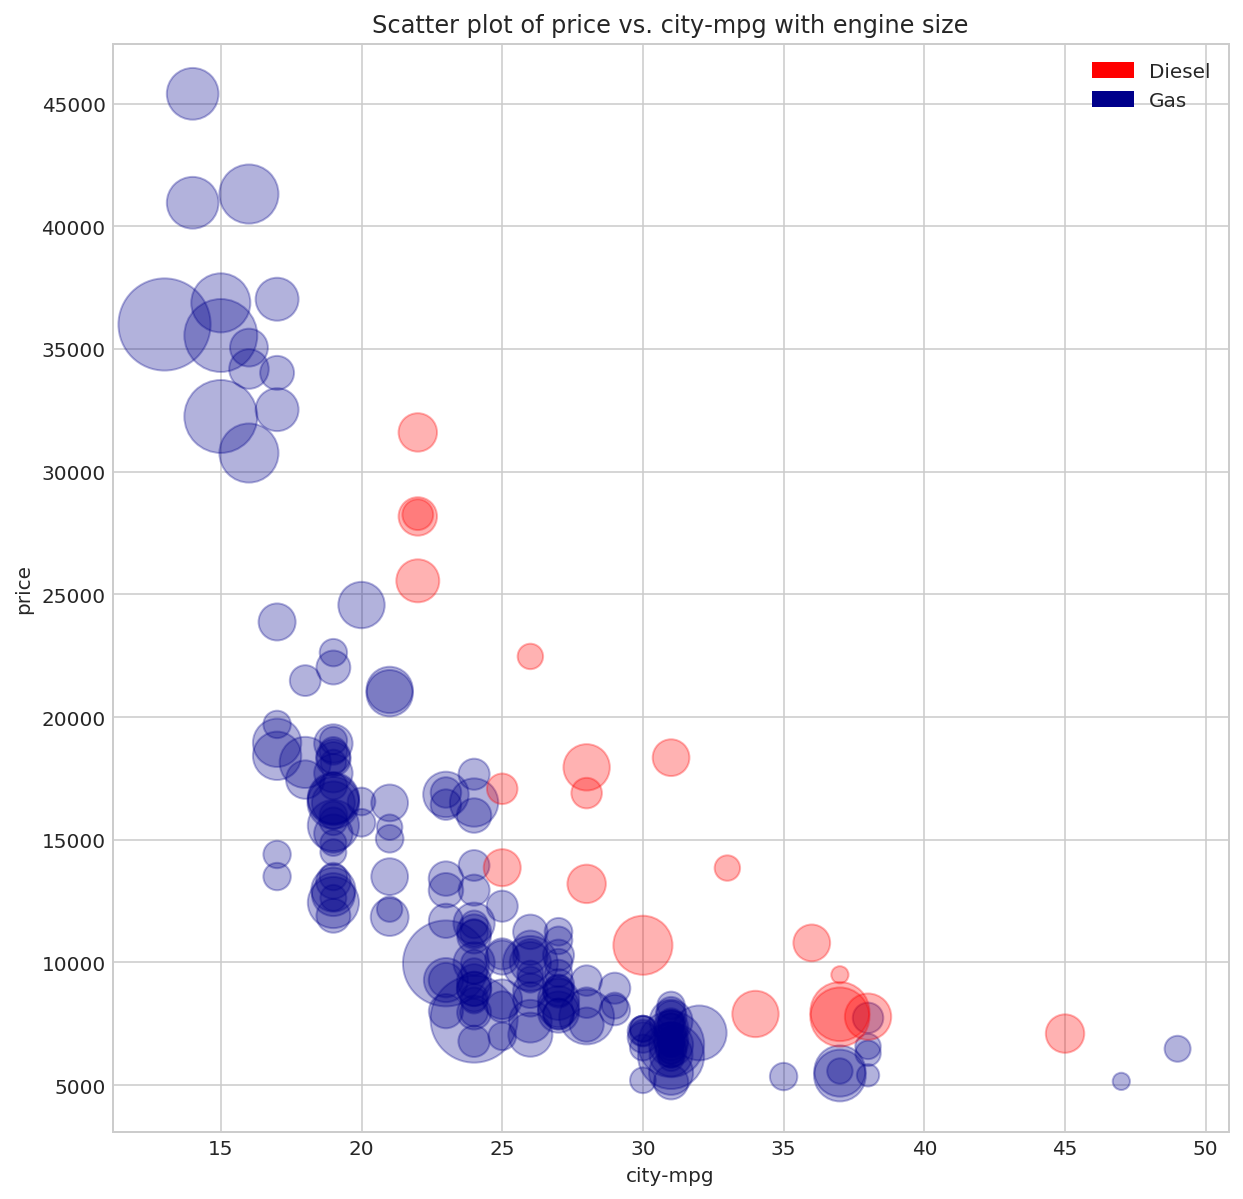

In [15]:
def auto_size_2(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .02 * auto_prices['engine-size'] * auto_prices['engine-size'], 
                       alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .02 * auto_prices['engine-size']  * auto_prices['engine-size'], 
                       alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size_2(auto_prices, ['city-mpg']) 

**Usando formas de marcador**
- A forma do marcador pode ser usada para projetar uma dimensão adicional em uma superfície de traçado bidimensional. Tipicamente, diferentes formas de marcador são usadas para indicar as categorias de uma variável categórica. Como com outras estética, não faça isso. Muitos marcadores semelhantes em um gráfico apenas ofuscarão as relações que você está tentando mostrar.
- O código na célula abaixo usa diferentes formas de marcador para indicar carros de aspiração padrão e turbo.

'Done'

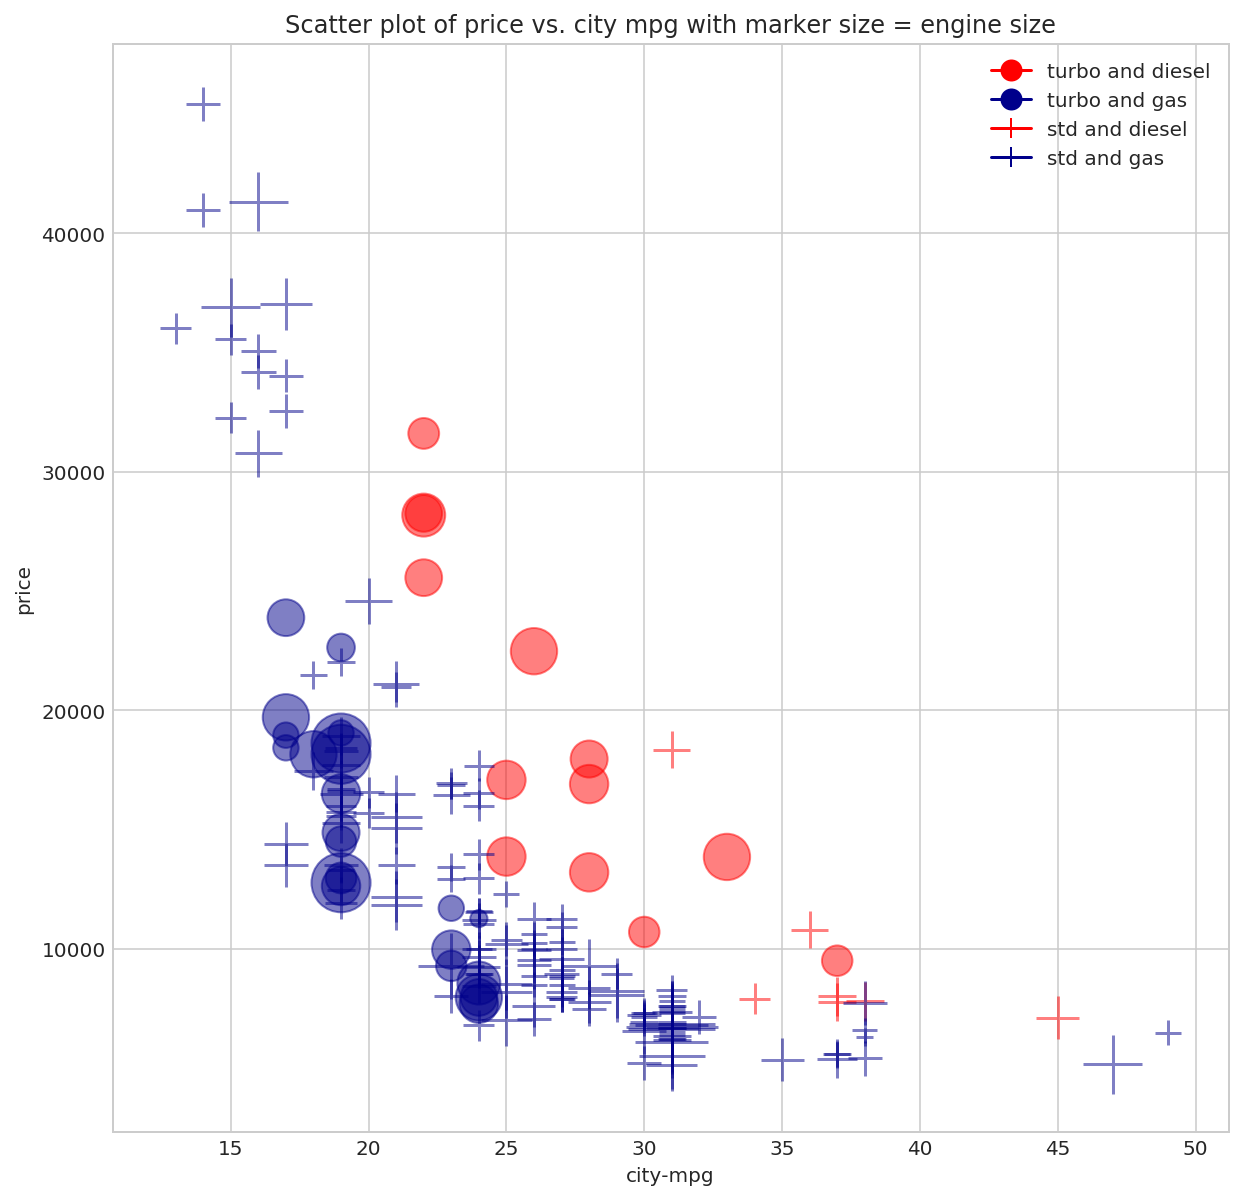

In [16]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.loc[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(auto_prices)

- O plano acima planeja cinco dimensões na superfície do enredo bidimensional: preço, mpg da cidade, tamanho do motor, tipo de aspiração e tipo de combustível. Demora algum tempo e esforço para entender completamente todas as informações fornecidas.
- Algumas conclusões que podemos extrair do gráfico acima incluem:
- Os carros mais caros possuem aspirações maiores, padrão, motores a gás.
A maioria dos carros diesel usa aspiração de tubo e estes tendem a ser mais caros.
Os carros do motor a gás de aspiração turbo estão na baixa gama de eficiência de combustível, mas no meio da faixa de preço.
Alguns carros de baixo custo possuem grandes motores a gás.

**Estética específica: caixas de histograma**
- Nós usamos alguma estética bastante geral para produzir relacionamentos em nosso conjunto de dados. Vamos agora ver uma estética adicional que tende a ser mais específica do tipo de gráfico.
- Como primeiro exemplo, examinaremos o efeito de mudar o número de caixas em um histograma. O código abaixo agrupa o histograma do tamanho do motor usando diferentes números de caixas; O padrão de 10 caixas e 40 caixas. Esta é também a primeira vez que colocamos vários conjuntos de eixos na mesma figura. A primeira linha de código define dois subplots em uma linha na figura.

Text(0,0.5,'Number of autos')

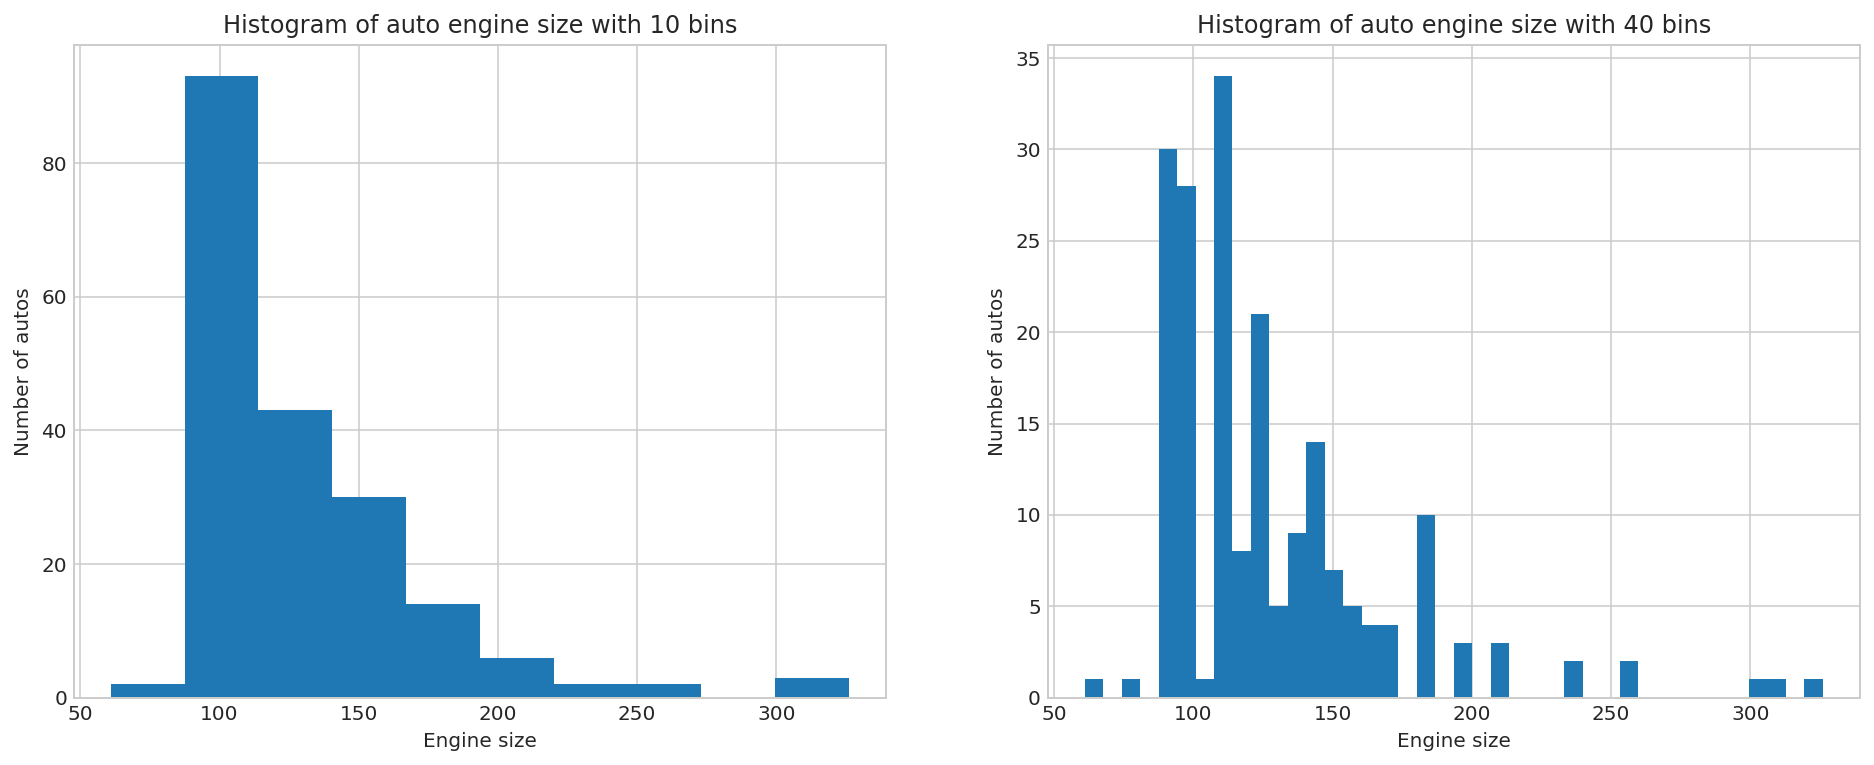

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

- Observe que o histograma com 10 compartimentos dá um resultado mais suave, o que pode ser melhor para obter uma impressão geral da distribuição. O histograma com 40 compartimentos mostra mais detalhes, particularmente para os outliers.

**Estética específica - Parcelas de violin plot**
- No código mostrado abaixo, o argumento tonalidade é usado para mostrar os KDEs de carros de aspiração padrão e turbo, agrupados pela variável do eixo x do tipo de combustível. O gráfico resultante mostra três dimensões: preço, tipo de combustível e aspiração.

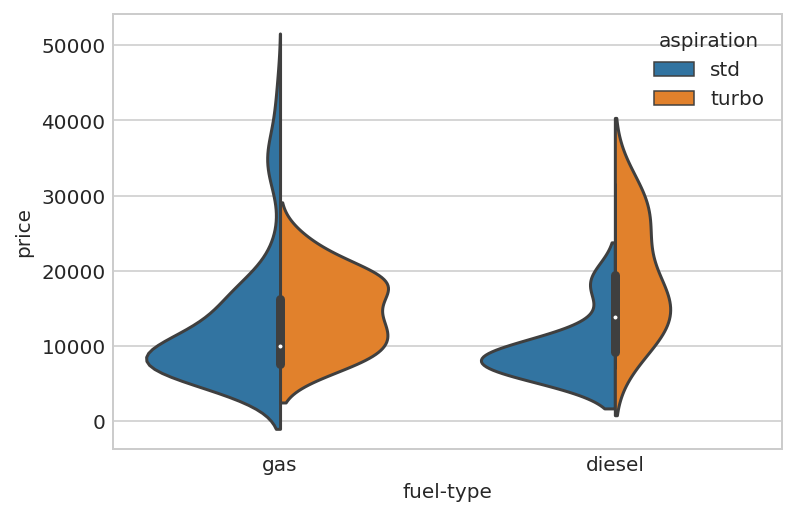

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

- Da parcela acima, podemos ver que os carros de motores de aspiração padrão têm a mais ampla gama de preços. 
- Também podemos ver que os carros a diesel tendem a ser mais caros. Finalmente, os carros de motores a gasolina e a diesel com aspiração padrão apresentam preços distorcidos para o lado inferior.

**Estética específica: Parcelas de caixa**
- Usando Seaborn podemos adicionar dados de grupo para gráficos de caixa por tonalidade, como acabamos de fazer com parcelas de violino. 
- O código abaixo usa a tonalidade para agrupar os carros por estilo corporal. Como antes, o eixo x agrupa os automóveis pelo tipo de combustível.

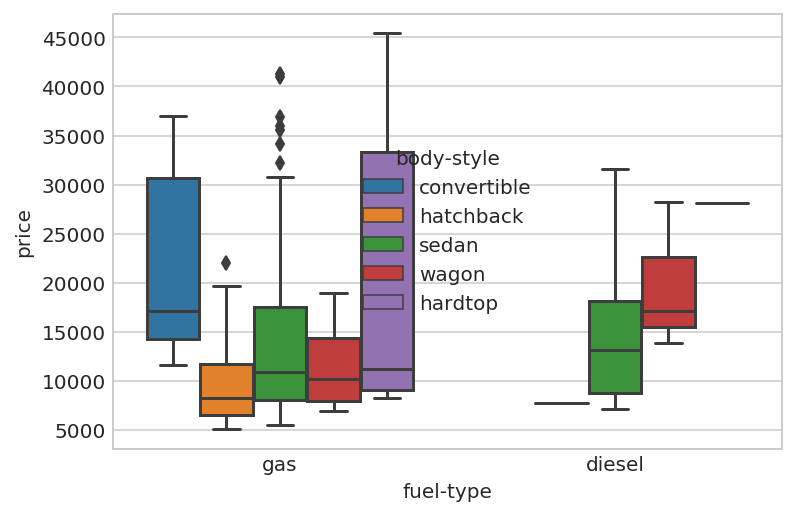

In [25]:
sns.set_style("whitegrid")
ax=sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")


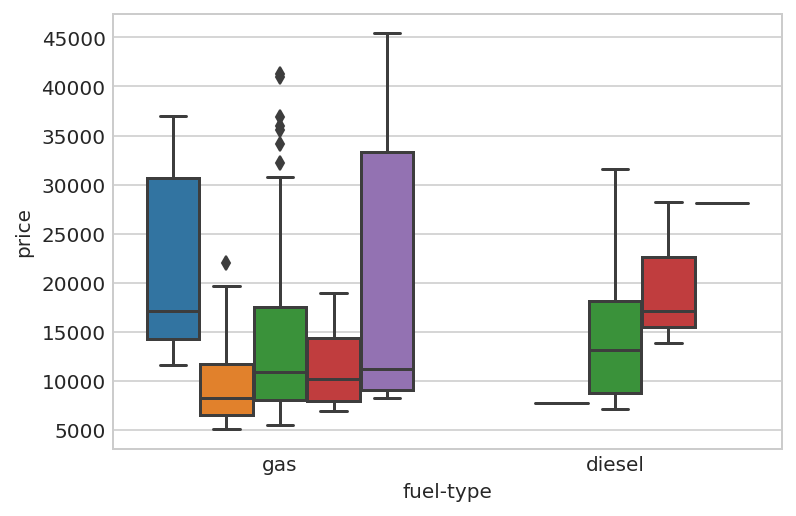

In [28]:
sns.set_style("whitegrid")
ax=sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [])

- Examine o plot, observando vários relacionamentos interessantes, incluindo:
- Os hardtops de gás têm a mais ampla gama de preços, seguidos de conversíveis a gás.
- Existem poucos estilos disponíveis para carros diesel.
- Os hatchback a gás são geralmente os carros de menor custo, seguem os sedans de gás e diesel.
- Existem dois carros diesel com tipos de corpo únicos. Uma trama diferente ou um subconjunto simples dos dados é necessário para identificar estes tipos de corpo.

**Parcelas de múltiplos plots e facetas**
- Nós exploramos os tipos básicos de lote e usamos a estética para projetar múltiplas dimensões em tipos de enredo básicos. Agora vamos investigar o uso de múltiplos eixos de tramas e de uma técnica conhecida como facetada. Faceting envolve o uso de valores de variáveis categóricas ou numéricas para criar uma grade sistemática de plots relacionados. As facetas são feitas por vários outros elementos, incluindo plotagem condicionada ou traçado de rede.
- Vamos agora explorar vários aspectos destes:

1. Paramentos com densidade marginal
2. Parcelas de dispersão em par
3. Parcelas de múltiplos eixos
4. Parcelas facetadas

**Parcelas com densidade  nas margens**
- Um tipo de gráfico de multi-eixo simples é um gráfico de dispersão com a densidade marginal de cada dimensão mostrada ao longo do eixo horizontal ou vertical.
- O código na célula abaixo usa o método de junção conjunta de Seaborn para criar apenas um enredo. As colunas a serem plotadas nos eixos x e y, juntamente com o nome de uma moldura de dados pandas ou numpy, são especificadas como argumentos. O argumento de transparência alfa é especificado para lidar com ***overplotting***.
- O gráfico abaixo mostra a relação entre preço e tamanho do motor. A distribuição marginal do preço é mostrada ao longo do eixo y e a distribuição marginal do tamanho do motor é mostrada ao longo do eixo x.

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


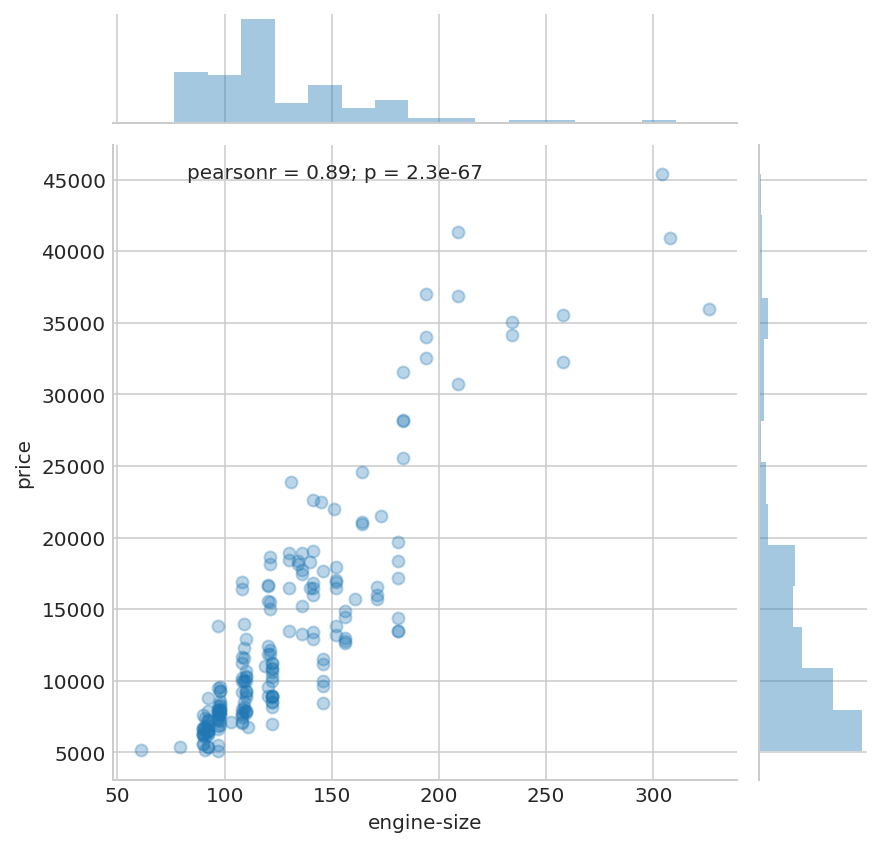

In [20]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_prices, alpha = 0.3)

#### Exercício 1
###### Até agora, na nossa exploração dos dados automotivos com gráficos de dispersão, focamos a relação entre preço e mpg da cidade. Neste exercício, você criará gráficos para algumas colunas adicionais:

- Mude pelo menos uma das opções de cores.
- Ligue para a função auto_color com uma lista de colunas diferentes: ***['engine-size', 'curb-weight']***.
- Examine os plots resultantes. O que você pode aprender com essas plots?

#### Exercício 2
###### Você já viu vários exemplos de usar a estética do gráfico para destacar vários relacionamentos no conjunto de dados. Você pode continuar a explorar o conjunto de dados usando a estética. Experimente o seguinte:

- Copie o código usado para o plano de violino em uma nova célula.
- Altere o grupo x por variável para "wheel-base".
- Examine o plot resultante. Qual a nova informação agora aparente?

#### Exercício 3
###### Agora é sua vez de tentar alguns plots com densidades nas margens. Faça o seguinte:

- Altere a variável do eixo x para 'city-mpg'.
- Examine o plot resultante. Qual a nova informação agora aparente?